###Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
from ipywidgets import interact
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
data=pd.read_excel("data.xlsx")


In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
data["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
data.shape

(2200, 8)

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

#Analytics

In [ ]:
data['N'].mean()

50.551818181818184

In [ ]:
data['P'].mean()

53.36272727272727

In [ ]:
data['K'].mean()

48.14909090909091

In [ ]:
data['ph'].mean()

6.469480065256362

In [ ]:
data['rainfall'].mean()

103.46365541576816

In [ ]:
data['humidity'].mean()

71.48177921778637

In [ ]:
data['temperature'].mean()

25.616243851779544

In [ ]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("---------------------------------------------")
    print("Nitrogen")
    print(" Min Nitrigen   :", x['N'].min())
    print("Avg Nitrogen   :", x['N'].mean())
    print("Max Nitrogen   :", x['N'].max())
    print("---------------------------------------------")
    print("Phosphorous")
    print(" Min Phosphorous   :", x['P'].min())
    print("Avg Phosphorous   :", x['P'].mean())
    print("Max Phosphorous   :", x['P'].max())
    print("---------------------------------------------")
    print("Potassium")
    print(" Min Potassium :", x['K'].min())
    print("Avg Potassium :", x['K'].mean())
    print("Max Potassium :", x['K'].max())
    print("---------------------------------------------")
    print("Temperature")
    print(" Min Temp : {}".format(x['temperature'].min()))
    print("Avg Temp : {}".format(x['temperature'].mean()))
    print("Max Temp : {}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print(" Min Humidity   : {}".format(x['humidity'].min()))
    print("Avg Humidity   : {}".format(x['humidity'].mean()))
    print("Max Humidity   : {}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("PH")
    print(" Min PH   : {0:.2f}".format(x['ph'].min()))
    print("Avg PH   : {0:.2f}".format(x['ph'].mean()))
    print("Max PH   : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Rainfall")
    print(" Min Rainfall   : {0:.2f}".format(x['rainfall'].min()))
    print("Avg Rainfall   : {0:.2f}".format(x['rainfall'].mean()))
    print("Max Rainfall   : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [ ]:
@interact
def compare(conditions=["N","P","K","temperature","ph","humidity","rainfall"]):
  print("Low Sustainable Crops\n")
  print(data[data[conditions]> data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [ ]:
@interact
def compare(conditions=["N","P","K","temperature","ph","humidity","rainfall"]):
  print("High Sustainable Crops\n")
  print(data[data[conditions]< data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

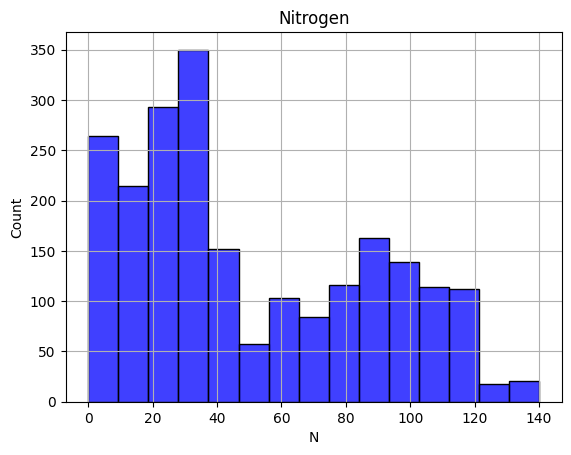

In [ ]:
plt.subplot(1,1,1)
sns.histplot(data['N'],color="blue")
plt.title("Nitrogen")
plt.grid()
plt.show()

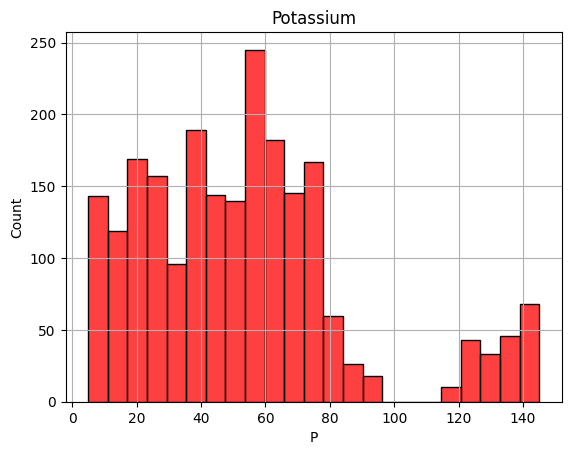

In [ ]:
plt.subplot(1,1,1)
sns.histplot(data['P'],color="red")
plt.title("Phosphorus")
plt.grid()
plt.show()

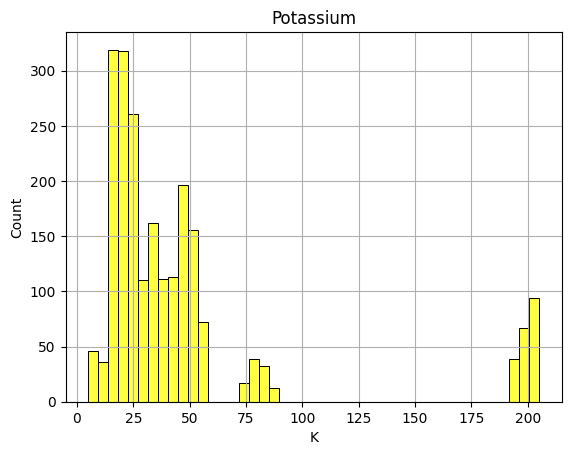

In [ ]:
plt.subplot(1,1,1)
sns.histplot(data['K'],color="yellow")
plt.title("Potassium")
plt.grid()
plt.show()

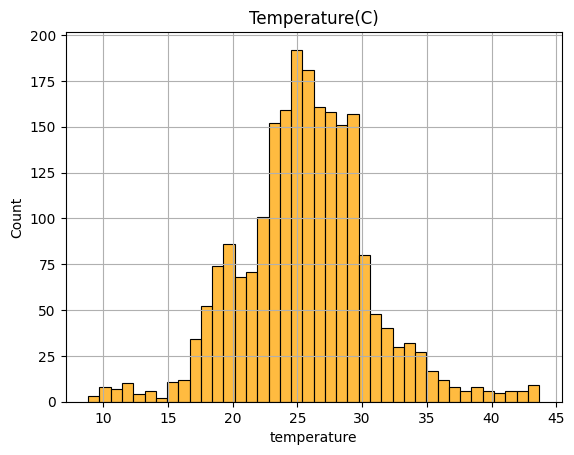

In [ ]:
plt.subplot(1,1,1)
sns.histplot(data['temperature'],color="orange")
plt.title("Temperature(C)")
plt.grid()
plt.show()

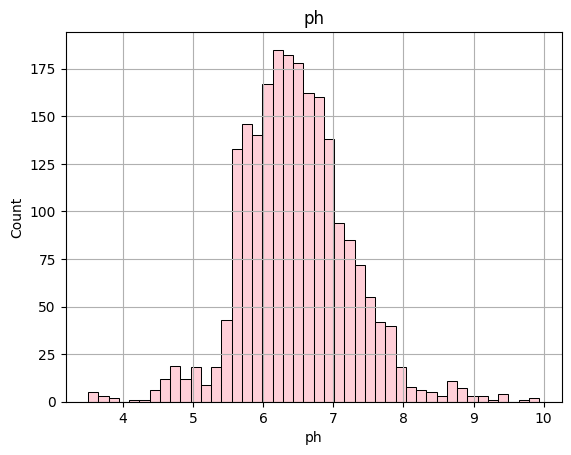

In [ ]:
plt.subplot(1,1,1)
sns.histplot(data['ph'],color="pink")
plt.title("ph")
plt.grid()
plt.show()

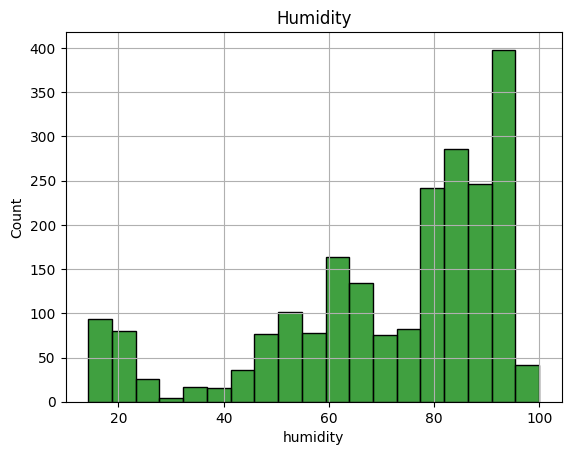

In [ ]:
plt.subplot(1,1,1)
sns.histplot(data['humidity'],color="green")
plt.title("Humidity")
plt.grid()
plt.show()

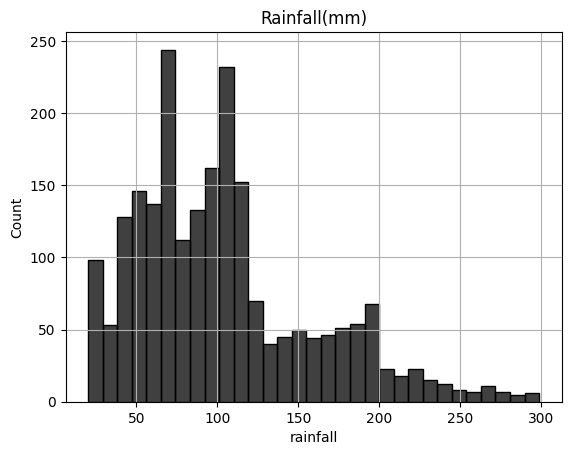

In [ ]:
plt.subplot(1,1,1)
sns.histplot(data['rainfall'],color="black")
plt.title("Rainfall(mm)")
plt.grid()
plt.show()

In [ ]:
print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']


In [ ]:
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())

Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']


In [ ]:
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Rainy Crops
['rice' 'papaya' 'coconut']


###Clustering with KMeans

In [ ]:
x=data.loc[:,["N","P","K","temperature","ph","humidity","rainfall"]]
x_data=pd.DataFrame(x)

In [ ]:
x_data.head()

,N,P,K,temperature,ph,humidity,rainfall
0,90,42,43,20.879744,6.502985,82.002744,202.935536
1,85,58,41,21.770462,7.038096,80.319644,226.655537
2,60,55,44,23.004459,7.840207,82.320763,263.964248
3,74,35,40,26.491096,6.980401,80.158363,242.864034
4,78,42,42,20.130175,7.628473,81.604873,262.717340


In [ ]:
plt.rcParams["figure.figsize"]=(10,4)
l=[]
for i in range(1,11):
  k=KMeans(n_clusters=i,init="k-means++",max_iter=500,n_init=10,random_state=0)
  k.fit(x)
  l.append(k.inertia_)
  print(l)

[18820170.46364591]
[18820170.46364591, 12070916.353533484]
[18820170.46364591, 12070916.353533484, 7423970.8654109035]
[18820170.46364591, 12070916.353533484, 7423970.8654109035, 5337369.950298384]
[18820170.46364591, 12070916.353533484, 7423970.8654109035, 5337369.950298384, 4417511.116768206]
[18820170.46364591, 12070916.353533484, 7423970.8654109035, 5337369.950298384, 4417511.116768206, 3748646.207999495]
[18820170.46364591, 12070916.353533484, 7423970.8654109035, 5337369.950298384, 4417511.116768206, 3748646.207999495, 3122776.0933495294]
[18820170.46364591, 12070916.353533484, 7423970.8654109035, 5337369.950298384, 4417511.116768206, 3748646.207999495, 3122776.0933495294, 2727858.0937568424]
[18820170.46364591, 12070916.353533484, 7423970.8654109035, 5337369.950298384, 4417511.116768206, 3748646.207999495, 3122776.0933495294, 2727858.0937568424, 2374020.036785368]
[18820170.46364591, 12070916.353533484, 7423970.8654109035, 5337369.950298384, 4417511.116768206, 3748646.207999495,

<function matplotlib.pyplot.show(close=None, block=None)>

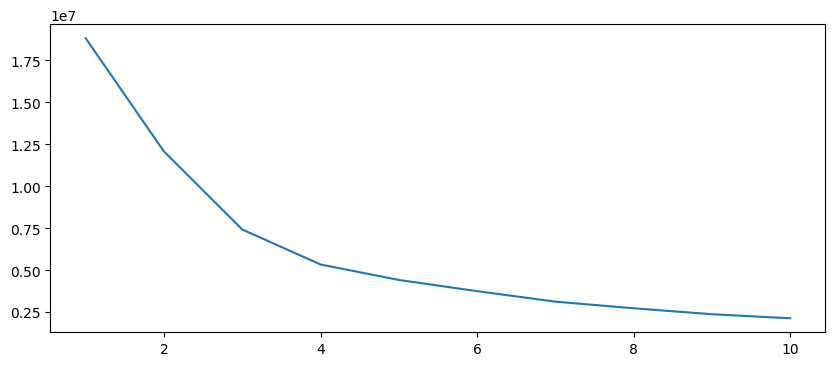

In [ ]:
plt.plot(range(1,11),l)
plt.show

In [ ]:
k = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = k.fit_predict(x)

In [ ]:
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

In [ ]:
counts = z[z['cluster'] == 0]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Cluster 1:", list(d.index))

Cluster 1: ['chickpea', 'kidneybeans', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'mango', 'orange']


In [ ]:
counts = z[z['cluster'] == 1]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Cluster 2:", list(d.index))

Crops in Cluster 2: ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton']


In [ ]:
counts = z[z['cluster'] == 2]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Cluster 3:", list(d.index))


Cluster 3: ['grapes', 'apple']


In [ ]:
counts = z[z['cluster'] == 3]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Cluster 4:", list(d.index))

Cluster 4: ['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']


###Logistic Regression

In [ ]:
y=data['label']
x=data.drop(["label"],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.84      0.87      0.86        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.84      0.96      0.90        28
      grapes       1.00      1.00      1.00        30
        jute       0.83      0.94      0.88        31
 kidneybeans       0.96      1.00      0.98        26
      lentil       0.91      0.91      0.91        22
       maize       0.92      0.81      0.86        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.81      0.81      0.81        36
    mungbean       1.00      0.97      0.98        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    